# Unfolding Exercise (Gaussian)

In [26]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from bb.tools.hist_tools_modified import hist
from bb.tools.bayesian_blocks_modified import bayesian_blocks
import bb.tools.unfolding as uf

In [27]:
rnd.seed(100)

In [28]:
gen_dist = rnd.normal(100,20,10000)
df_evts = pd.DataFrame({'gen':gen_dist})

In [29]:
df_evts['reco'] = rnd.normal(df_evts['gen'], df_evts['gen']*0.1)
xlims = (min(df_evts['reco']), max(df_evts['reco']))
#df_evts['reco'] = df_evts['gen']

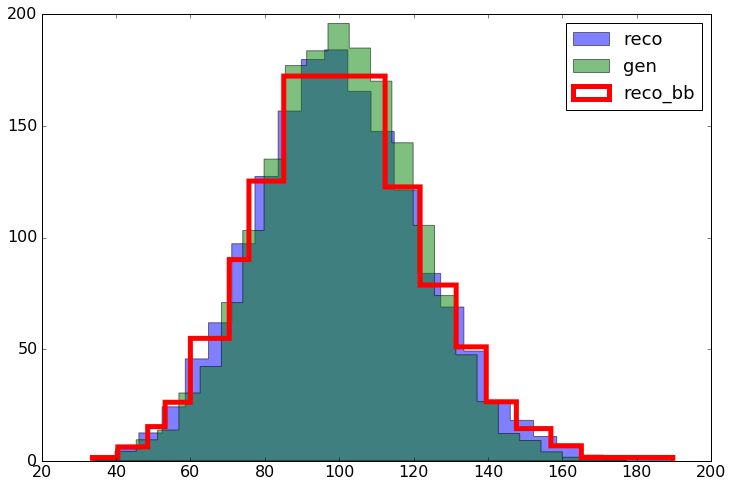

In [30]:
hist(df_evts['reco'], 25, alpha=0.5, histtype='stepfilled', label='reco', scale='binwidth')
hist(df_evts['gen'], 25, alpha=0.5, histtype='stepfilled', label='gen', scale='binwidth')
hist(df_evts.reco.values, p0=0.05, bins='blocks', linewidth=5, histtype='step', scale='binwidth', label='reco_bb')
plt.legend()

In [48]:
bb_bin = bayesian_blocks(df_evts['reco'], p0=0.05)

In [49]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40,80, bb_bin]

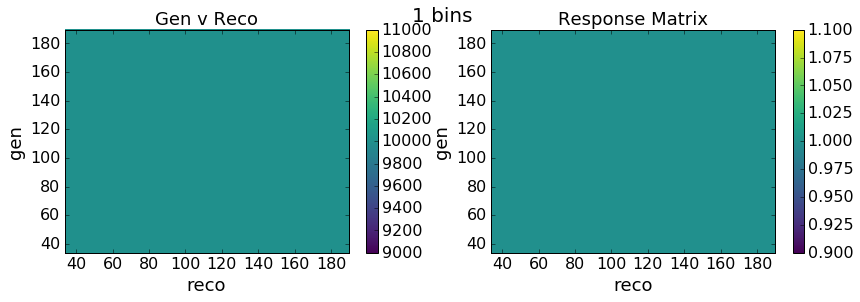

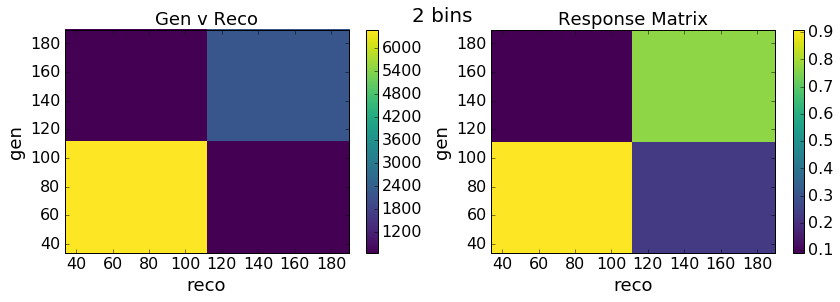

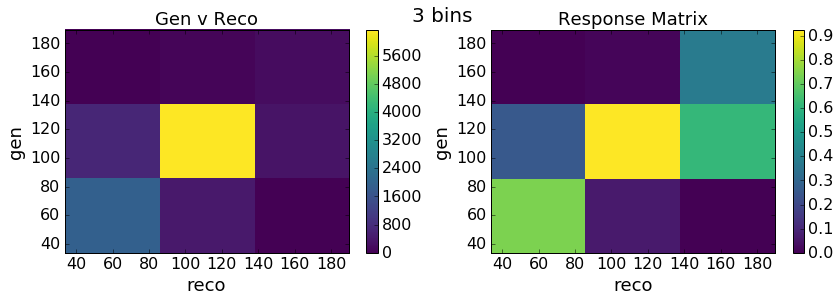

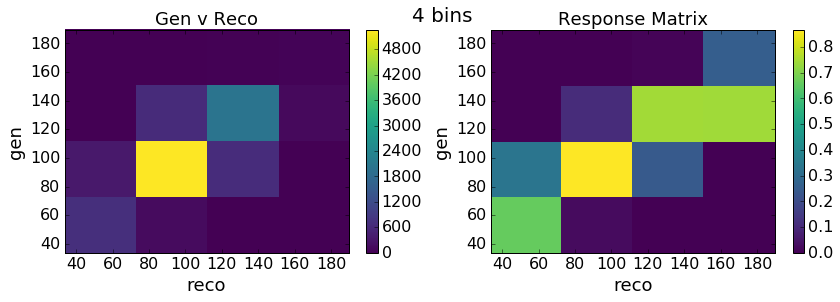

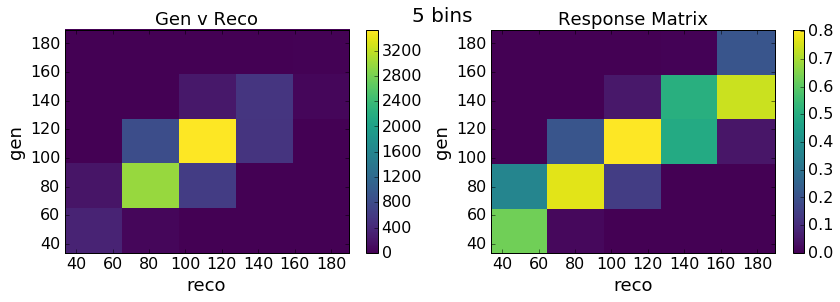

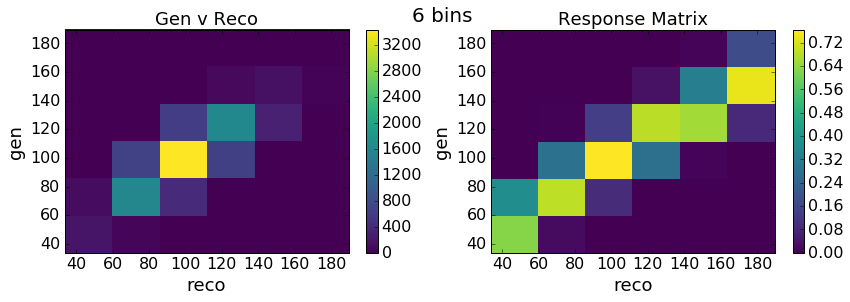

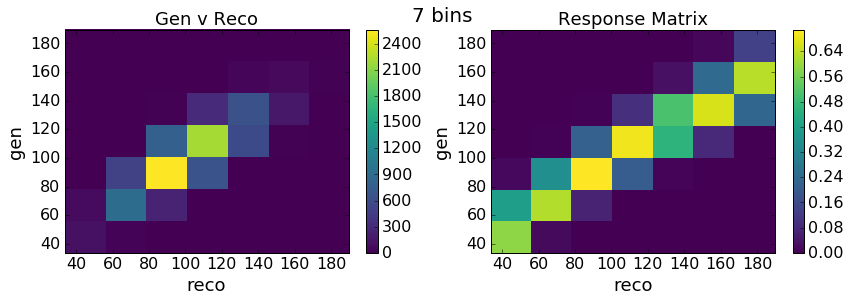

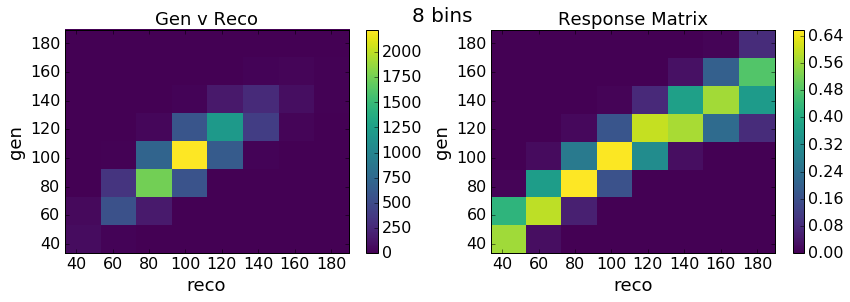

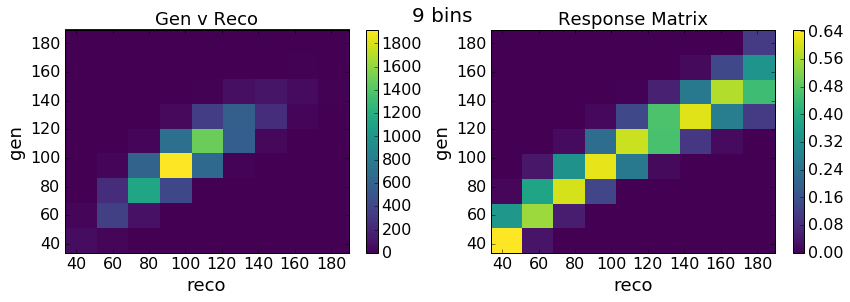

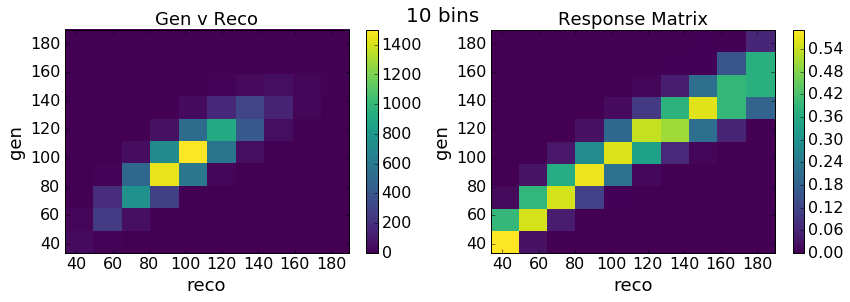

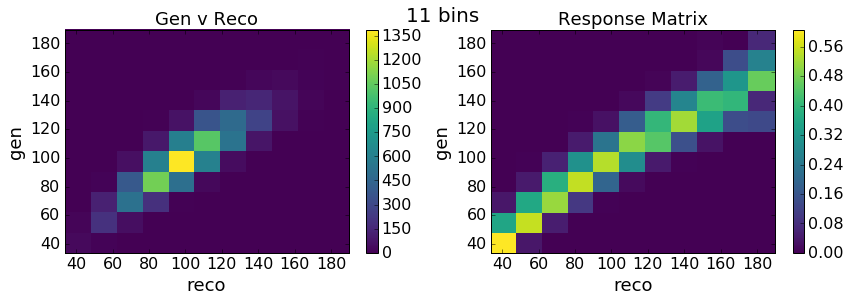

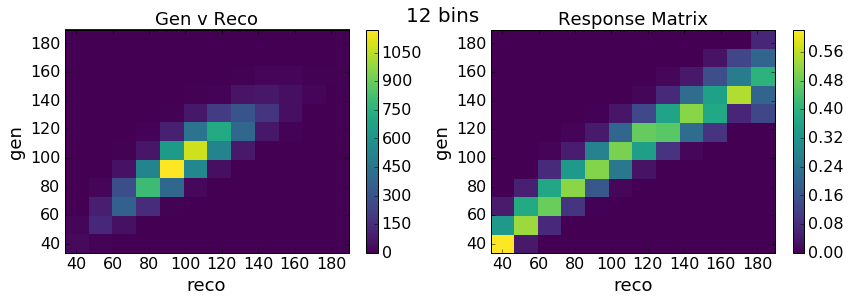

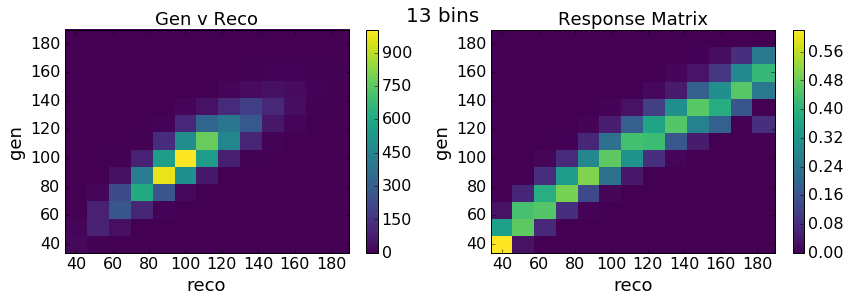

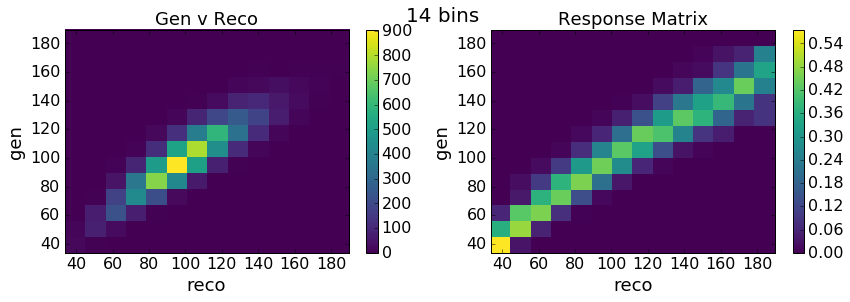

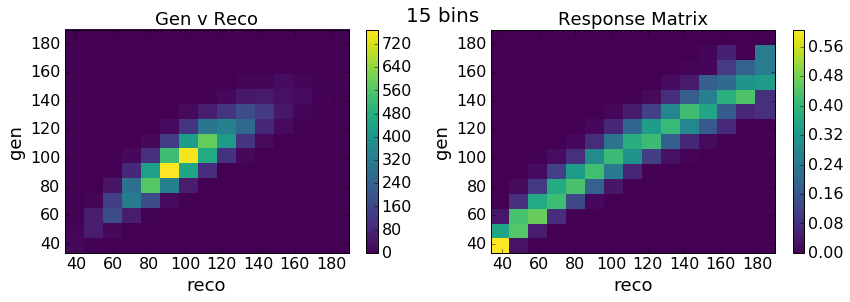

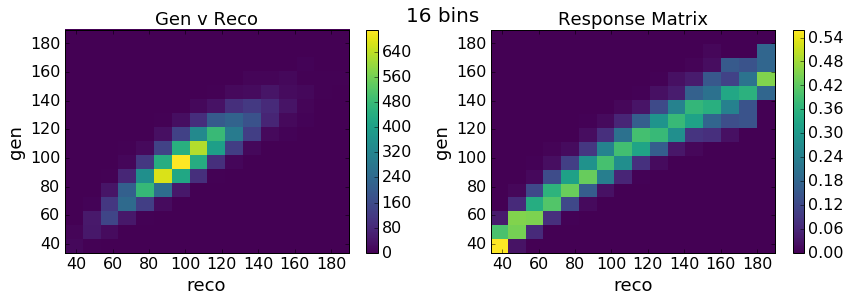

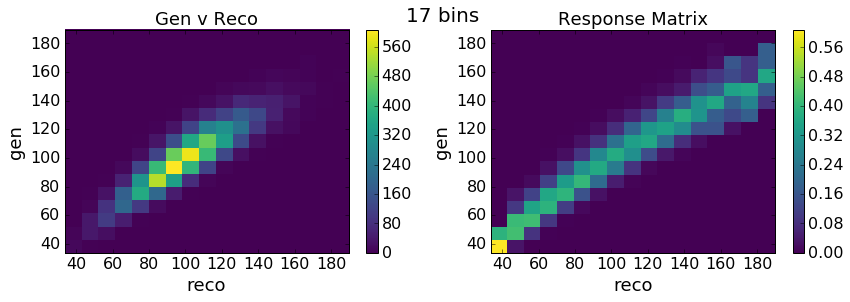

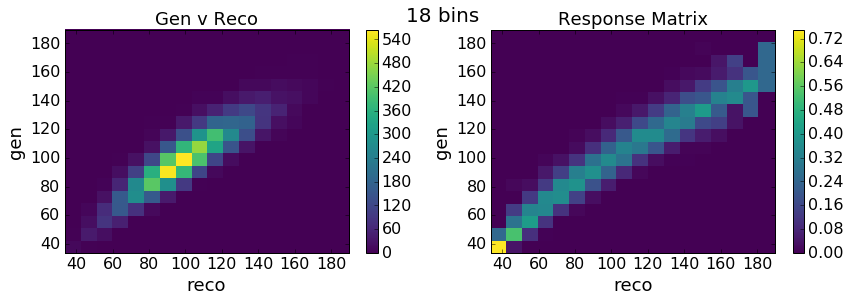

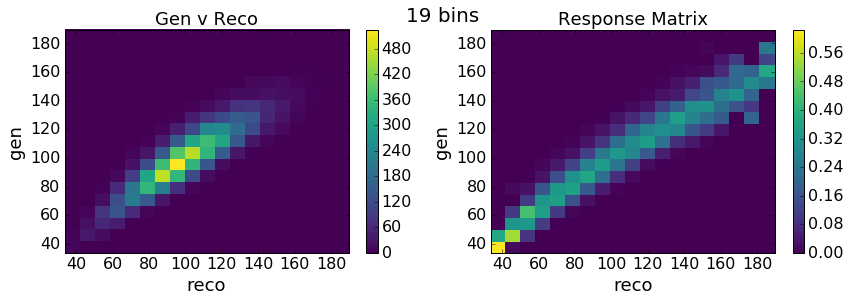

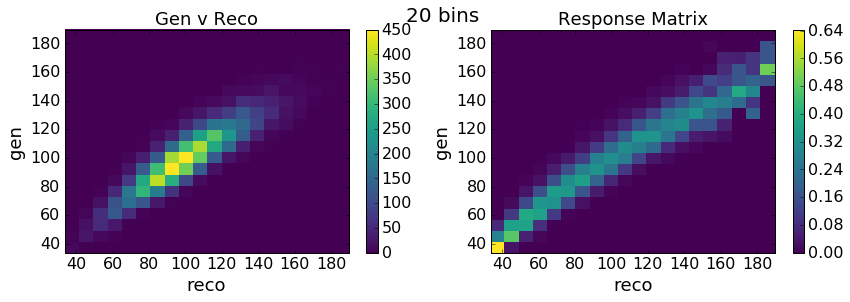

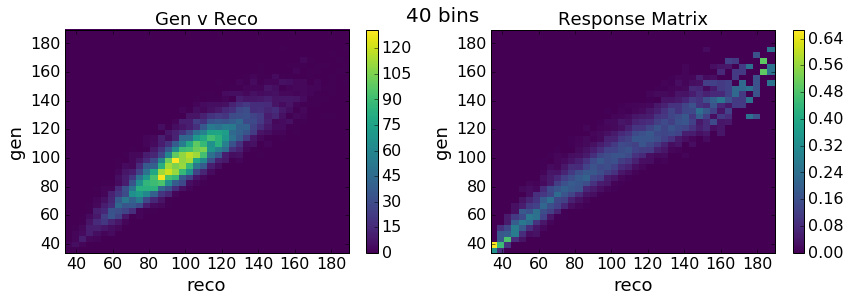

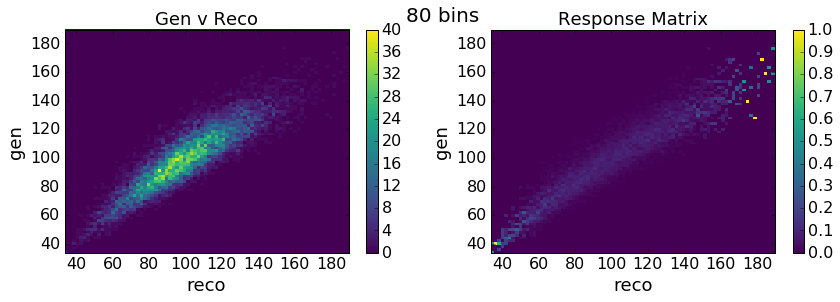

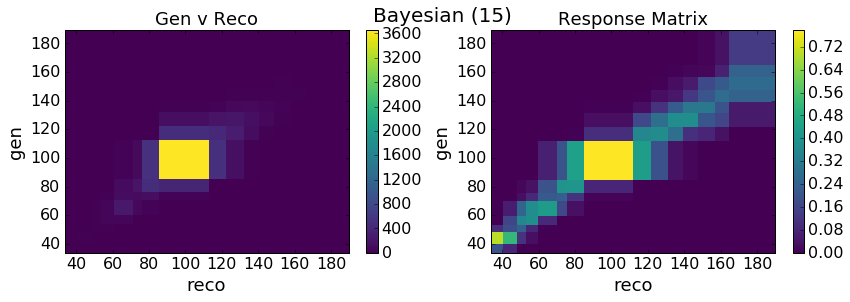

In [50]:
plt.rcParams['figure.figsize'] = (14,4)
gran_vals = []
diag_vals = []
mult_vals = []
add_vals = []

for b in bins:
    bc = bex = bey = {}
    re = uf.calc_response_matrix(df_evts, b, xlims)
    uf.plot_events_and_response(df_evts, b, re, xlims)
    
    gran = uf.calc_granularity(re)
    diag = uf.calc_diagonality(re)
    gran_vals.append(gran)
    diag_vals.append(diag)
    mult_vals.append(gran*diag)
    add_vals.append(gran+diag)
plt.rcParams['figure.figsize'] = (12,8)
bin_labels = bins[:]
bin_labels[-1] = len(bin_labels[-1])
#bins[-2] = len(bins[-2])

In [51]:
df = pd.DataFrame({'gran':gran_vals, 'diag':diag_vals, 'mult':mult_vals, 'add':add_vals},index=bin_labels)

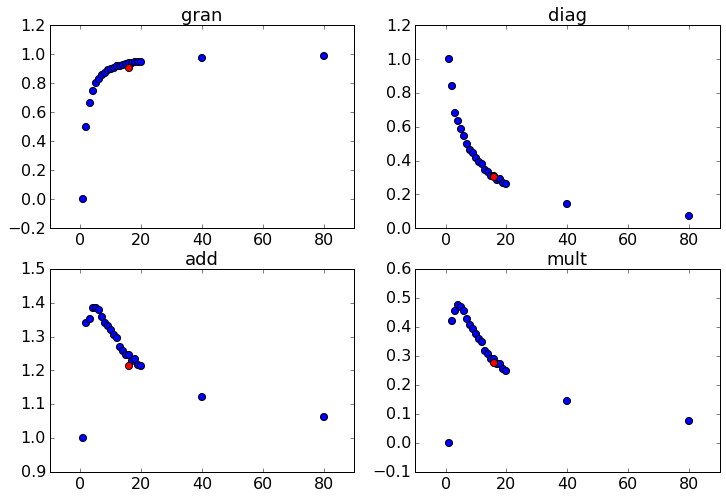

In [52]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
for i, val in enumerate(['gran','diag','add','mult']):
    ax = axes[i]
    ax.scatter(df.index[:-1], df[val][:-1], s = 50)
    ax.scatter(df.index[-1:], df[val][-1:], s=50, c='red')
    #ax.scatter(df.index[-1:], df[val][-1:], s=50, c='green')
    ax.set_title(val)

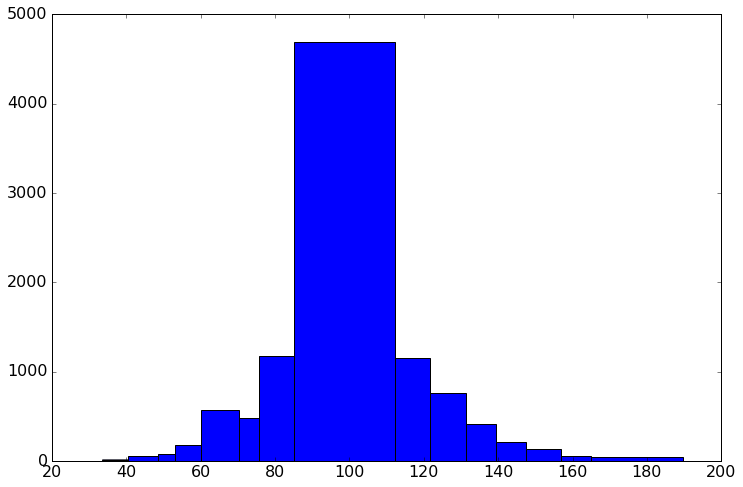

In [43]:
hist1d = plt.hist(df_evts.reco, bins[-1])

In [45]:
np.dot(hist1d[0], rem)

array([    6.,    46.,    45.,   153.,   456.,   416.,  1162.,  4978.,
        1343.,   817.,   349.,   130.,    72.,    19.,     8.])